<a href="https://colab.research.google.com/github/mitchellostrow/NM2020/blob/master/Steinmetz_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [6]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


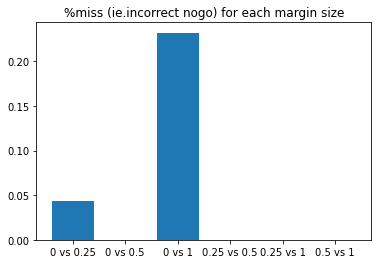

In [7]:
#@title %miss (ie.incorrect nogo) for each margin size
from matplotlib import pyplot as plt
response = dat['response']
vis_left = dat['contrast_left']
vis_right = dat['contrast_right']

total_dict = {
    '0 vs 0.25': np.sum(np.logical_or(np.logical_and(vis_left==0, vis_right==0.25), 
                               np.logical_and(vis_left==0.25, vis_right==0))),
    '0 vs 0.5':np.sum(np.logical_or(np.logical_and(vis_left==0, vis_right==0.5), 
                               np.logical_and(vis_left==0.5, vis_right==0))),
    '0 vs 1':np.sum(np.logical_or(np.logical_and(vis_left==0, vis_right==1), 
                               np.logical_and(vis_left==1, vis_right==0))),
    '0.25 vs 0.5':np.sum(np.logical_or(np.logical_and(vis_left==0.25, vis_right==0.5), 
                               np.logical_and(vis_left==0.5, vis_right==0.25))),
    '0.25 vs 1':np.sum(np.logical_or(np.logical_and(vis_left==0.25, vis_right==1), 
                               np.logical_and(vis_left==1, vis_right==0.25))),
    '0.5 vs 1':np.sum(np.logical_or(np.logical_and(vis_left==0.5, vis_right==1), 
                               np.logical_and(vis_left==1, vis_right==0.5))),
}

inc_go_dict = [
    np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.25)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==0.25, vis_right==0)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.5)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==1)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==0.5)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0.25)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==1)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.25)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0.5, vis_right==1)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.5)).sum()
]

miss_dict = [
    np.logical_and(response==0,np.logical_and(vis_left==0, vis_right==0.25)).sum() + np.logical_and(response==0,np.logical_and(vis_left==0.25, vis_right==0)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0, vis_right==0.5)).sum() + np.logical_and(response==0,np.logical_and(vis_left==0.5, vis_right==0)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0, vis_right==1)).sum() + np.logical_and(response==0,np.logical_and(vis_left==1, vis_right==0)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0.25, vis_right==0.5)).sum() + np.logical_and(response==0,np.logical_and(vis_left==0.5, vis_right==0.25)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0.25, vis_right==1)).sum() + np.logical_and(response==0,np.logical_and(vis_left==1, vis_right==0.25)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0.5, vis_right==1)).sum() + np.logical_and(response==0,np.logical_and(vis_left==1, vis_right==0.5)).sum()
]
x = list(total_dict.keys())
heights = [
           miss_dict[0] / total_dict['0 vs 0.25'],
           miss_dict[1] / total_dict['0 vs 0.5'],
           miss_dict[2] / total_dict['0 vs 1'],
           miss_dict[3] / total_dict['0.25 vs 0.5'],
           miss_dict[4] / total_dict['0.25 vs 1'],
           miss_dict[5] / total_dict['0.5 vs 1']
           ]
plt.figure()
plt.bar(x,heights)
plt.title('%miss (ie.incorrect nogo) for each margin size')
plt.show()

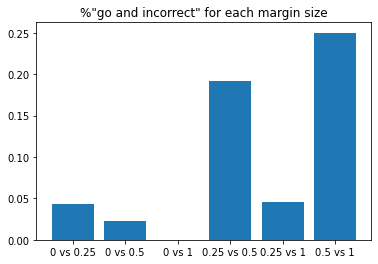

In [8]:
#@title %"go and incorrect" for each margin size
x = list(total_dict.keys())
heights = [
           inc_go_dict[0] / total_dict['0 vs 0.25'],
           inc_go_dict[1] / total_dict['0 vs 0.5'],
           inc_go_dict[2] / total_dict['0 vs 1'],
           inc_go_dict[3] / total_dict['0.25 vs 0.5'],
           inc_go_dict[4] / total_dict['0.25 vs 1'],
           inc_go_dict[5] / total_dict['0.5 vs 1']
           ]
plt.figure()
plt.bar(x,heights)
plt.title('%"go and incorrect" for each margin size')
plt.show()

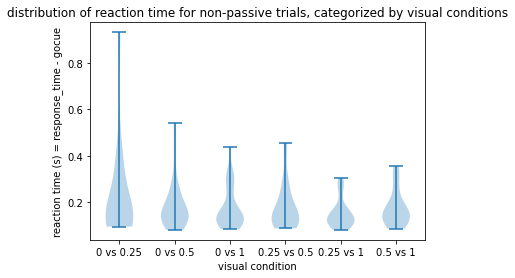

In [9]:
#@title distribution of reaction time for all non-passive trials, categorized by visual conditions
react_time = dat['response_time'] - dat['gocue']
a = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==0.25)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==0)))].squeeze()
b = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==0.5)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==0)))].squeeze()
c = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0)))].squeeze()
d = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==0.5)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==0.25)))].squeeze()
e = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0.25)))].squeeze()
f = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0.5)))].squeeze()

to_plot = [a,b,c,d,e,f]

labels = list(total_dict.keys())

plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (s) = response_time - gocue')
ax.set_title('distribution of reaction time for non-passive trials, categorized by visual conditions')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


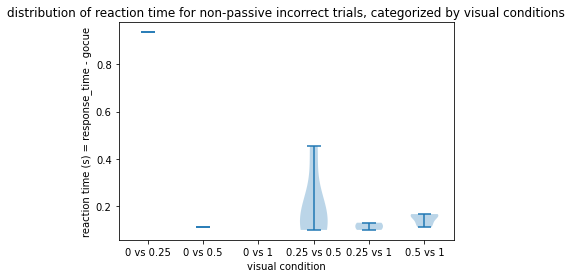

In [44]:
#@title distribution of reaction time for non-passive incorrect trials, categorized by visual conditions
react_time = dat['response_time'] - dat['gocue']
a = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.25)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.25, vis_right==0)))]
b = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.5)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0)))]
c = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0)))]
d = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==0.5)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0.25)))]
e = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.25)))]
f = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.5, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.5)))]
nans =np.empty(3) * np.nan
to_plot=[a,b,c,d,e,f]
for idx in range(len(to_plot)):
  if to_plot[idx].size==0:
    to_plot[idx]=nans

labels = list(total_dict.keys())

plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (s) = response_time - gocue')
ax.set_title('distribution of reaction time for non-passive incorrect trials, categorized by visual conditions')
plt.show()